<a href="https://colab.research.google.com/github/NimishPrakash/WebScrapping-and-ML/blob/main/WebScrapping_and_ML_on_Cricket_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scrapping and Machine Learning Model

# Web Scrapping
Web Scrape the `espncricinfo` website and make a csv file of players batting stats in T20Is.

There is total 4000 players stats which comprises total 80 different pages and we are going to web scrape all the pages and then get the required dataset for our machine learning model.

The main url is https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;template=results;type=batting



## Required libraries for webscrapping

In [1]:
import requests
from bs4 import BeautifulSoup
import csv

In [2]:
url = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;template=results;type=batting'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36'}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
# print(soup)

In [3]:
content = soup.find_all('tr', class_ = 'data1')
print(len(content))

50


In [4]:
for row in content:
  print(row)
  break

<tr class="data1">
<td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/player/34102.html">RG Sharma</a> (IND)</td>
<td class="left" nowrap="nowrap">2007-2024</td>
<td>159</td>
<td>151</td>
<td>19</td>
<td><b>4231</b></td>
<td>121*</td>
<td>32.05</td>
<td>3003</td>
<td>140.89</td>
<td>5</td>
<td>32</td>
<td>12</td>
<td>383</td>
<td>205</td>
<td class="padDD"><a href="javascript:void(0)" onmouseout="menuLayers.hide()" onmouseover="menuLayers.show('engine-dd1', event); window.status='investigate this query'; return true"><img alt="investigate this query" border="0" height="11" src="http://i.imgci.com/espncricinfo/guruInvestigate.gif" width="11"/></a></td>
</tr>


In [5]:
players_info = []
for row in content:
  # print(row)
  players_data = row.find_all('td')
  # print(players_data)
  info = []
  for d in players_data:
    if (d.text!=''):
      # print(d.text)
      info.append(d.text)
  players_info.append(info)
print(players_info)

[['RG Sharma (IND)', '2007-2024', '159', '151', '19', '4231', '121*', '32.05', '3003', '140.89', '5', '32', '12', '383', '205'], ['V Kohli (IND)', '2010-2024', '125', '117', '31', '4188', '122*', '48.69', '3056', '137.04', '1', '38', '7', '369', '124'], ['Babar Azam (PAK)', '2016-2024', '123', '116', '15', '4145', '122', '41.03', '3211', '129.08', '3', '36', '6', '440', '72'], ['PR Stirling (IRE)', '2009-2024', '145', '144', '11', '3601', '115*', '27.07', '2675', '134.61', '1', '23', '13', '418', '128'], ['MJ Guptill (NZ)', '2009-2022', '122', '118', '7', '3531', '105', '31.81', '2602', '135.70', '2', '20', '3', '309', '173'], ['Mohammad Rizwan (PAK)', '2015-2024', '102', '89', '21', '3313', '104*', '48.72', '2620', '126.45', '1', '29', '4', '278', '92'], ['DA Warner (AUS)', '2009-2024', '110', '110', '12', '3277', '100*', '33.43', '2300', '142.47', '1', '28', '6', '337', '122'], ['JC Buttler (ENG)', '2011-2024', '124', '114', '23', '3264', '101*', '35.86', '2231', '146.30', '1', '24',

In [6]:
# url = 'url = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;template=results;type=batting'
players_info = []
for i in range(1,81):
  url = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;page='+str(i)+';template=results;type=batting'
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36'}

  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.content, 'html.parser')
  content = soup.find_all('tr', class_ = 'data1')

  for row in content:
    players_data = row.find_all('td')
    info = []
    for d in players_data:
      if (d.text!=''):
        info.append(d.text)
    players_info.append(info)
# print(players_info)      All the players stats are scrapped

In [7]:
fields = ['Name', 'Span', 'Matches', 'Innings', 'NotOuts', 'Runs', 'Highest_score', 'Average', 'Balls_faced', 'Strike_rate', 'T100', 'T50', 'T0', 'No4s', 'No6s']

with open('cric_info.csv', 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerow(fields)
  csvwriter.writerows(players_info)
csvfile.close()

## Load Data and Perform EDA

In [8]:
import pandas as pd
df = pd.read_csv('cric_info.csv')
df.head()

,Name,Span,Matches,Innings,NotOuts,Runs,Highest_score,Average,Balls_faced,Strike_rate,T100,T50,T0,No4s,No6s
0,RG Sharma (IND),2007-2024,159,151,19,4231,121*,32.05,3003,140.89,5,32,12,383,205
1,V Kohli (IND),2010-2024,125,117,31,4188,122*,48.69,3056,137.04,1,38,7,369,124
2,Babar Azam (PAK),2016-2024,123,116,15,4145,122,41.03,3211,129.08,3,36,6,440,72
3,PR Stirling (IRE),2009-2024,145,144,11,3601,115*,27.07,2675,134.61,1,23,13,418,128
4,MJ Guptill (NZ),2009-2022,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173


In [9]:
df.shape

(3959, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           3959 non-null   object
 1   Span           3959 non-null   object
 2   Matches        3959 non-null   int64 
 3   Innings        3959 non-null   object
 4   NotOuts        3959 non-null   object
 5   Runs           3959 non-null   object
 6   Highest_score  3959 non-null   object
 7   Average        3959 non-null   object
 8   Balls_faced    3959 non-null   object
 9   Strike_rate    3959 non-null   object
 10  T100           3959 non-null   object
 11  T50            3959 non-null   object
 12  T0             3959 non-null   object
 13  No4s           3959 non-null   object
 14  No6s           3959 non-null   object
dtypes: int64(1), object(14)
memory usage: 464.1+ KB


In [11]:
df = df.drop(['Name','Span'], axis=1)

In [12]:
df.head()

,Matches,Innings,NotOuts,Runs,Highest_score,Average,Balls_faced,Strike_rate,T100,T50,T0,No4s,No6s
0,159,151,19,4231,121*,32.05,3003,140.89,5,32,12,383,205
1,125,117,31,4188,122*,48.69,3056,137.04,1,38,7,369,124
2,123,116,15,4145,122,41.03,3211,129.08,3,36,6,440,72
3,145,144,11,3601,115*,27.07,2675,134.61,1,23,13,418,128
4,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173


## Data Cleaning

In [13]:
df2 = pd.DataFrame()
for i in df.columns:
  try:
    df2[i] = pd.to_numeric(df[i])
  except:
    print(i)

Innings
NotOuts
Runs
Highest_score
Average
Balls_faced
Strike_rate
T100
T50
T0
No4s
No6s


In [14]:
df.Innings.unique()

array(['151', '117', '116', '144', '118', '89', '110', '114', '103',
       '104', '91', '90', '127', '108', '107', '109', '111', '68', '106',
       '77', '85', '121', '70', '80', '87', '75', '73', '69', '53', '78',
       '67', '94', '60', '79', '84', '95', '66', '62', '72', '59', '63',
       '65', '83', '50', '54', '64', '93', '46', '55', '52', '56', '58',
       '44', '74', '61', '51', '36', '47', '42', '31', '41', '45', '27',
       '32', '37', '43', '71', '39', '57', '38', '35', '33', '49', '48',
       '34', '30', '29', '40', '18', '19', '20', '26', '22', '28', '23',
       '25', '24', '17', '21', '15', '16', '13', '11', '14', '12', '10',
       '8', '9', '6', '7', '5', '3', '4', '2', '1', '-'], dtype=object)

Remove all the `-` values from the cric_info dataset

In [15]:
df2 = pd.DataFrame()
for i in df.columns:
  df2[i] = df[df[i]!='-'][i]

In [16]:
df2[df2['Innings']=='-'].count()

,0
Matches,0
Innings,0
NotOuts,0
Runs,0
Highest_score,0
Average,0
Balls_faced,0
Strike_rate,0
T100,0
T50,0


In [17]:
df3 = pd.DataFrame()
for i in df.columns:
  try:
    df3[i] = pd.to_numeric(df2[i])
  except:
    print(i)

Highest_score


There are many values with `*` in Highest Score column

In [18]:
df2.Highest_score.unique()

array(['121*', '122*', '122', '115*', '105', '104*', '100*', '101*',
       '172', '145*', '100', '95', '84', '99*', '91', '106*', '75', '117',
       '64*', '83', '116*', '110*', '89', '123', '98', '118*', '87',
       '132', '112', '124', '126', '96*', '63', '103*', '108', '133*',
       '73', '92', '86', '109*', '66', '94', '81', '79*', '90', '93*',
       '107*', '56', '89*', '101', '75*', '92*', '119', '103', '91*',
       '71*', '78', '72*', '88*', '105*', '111*', '125*', '124*', '74*',
       '70', '79', '81*', '54*', '107', '68', '85*', '62', '73*', '102*',
       '94*', '118', '88', '97*', '65*', '98*', '66*', '74', '61', '80',
       '77*', '57*', '137', '162*', '58*', '114', '110', '72', '80*',
       '96', '71', '69*', '83*', '77', '62*', '95*', '84*', '117*', '99',
       '48*', '57', '90*', '86*', '104', '113', '115', '42*', '137*',
       '68*', '60', '69', '87*', '109', '60*', '55', '63*', '85', '50',
       '58', '48', '51', '52', '134*', '67', '64', '55*', '40', '76',

In [19]:
df4 = df2.dropna()

In [20]:
df4.isna().sum()

,0
Matches,0
Innings,0
NotOuts,0
Runs,0
Highest_score,0
Average,0
Balls_faced,0
Strike_rate,0
T100,0
T50,0


There is no `nan` value present in the dataset.

In [21]:
df4.Highest_score.dtype

dtype('O')

All the values are strings

In [22]:
Best_Score = []
for i in df4.Highest_score:
  if i[-1]=='*':
    Best_Score.append(i[:-1])
  else:
    Best_Score.append(i)
print(Best_Score)

['121', '122', '122', '115', '105', '104', '100', '101', '172', '145', '100', '95', '84', '99', '91', '106', '75', '117', '64', '83', '116', '110', '100', '89', '123', '100', '98', '116', '118', '87', '132', '112', '124', '126', '83', '87', '96', '63', '117', '103', '104', '108', '133', '91', '73', '84', '92', '103', '96', '86', '109', '66', '94', '81', '122', '79', '90', '93', '110', '100', '107', '56', '89', '101', '75', '92', '104', '119', '103', '91', '71', '78', '72', '88', '89', '100', '105', '111', '125', '124', '74', '70', '100', '81', '79', '81', '54', '107', '99', '68', '85', '62', '78', '73', '64', '102', '94', '118', '72', '88', '96', '97', '93', '65', '98', '66', '100', '70', '91', '74', '72', '71', '90', '66', '65', '104', '61', '80', '99', '89', '79', '77', '79', '57', '89', '94', '115', '61', '137', '162', '73', '58', '92', '77', '78', '104', '72', '74', '73', '90', '114', '110', '64', '72', '94', '89', '80', '66', '107', '97', '72', '96', '71', '99', '91', '66', '69', 

In [23]:
df4['Highest_score'] = Best_Score    #df4.loc[:, 'Highest_score'] = Best_Score

<ipython-input-23-0c6af922689e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Highest_score'] = Best_Score    #df4.loc[:, 'Highest_score'] = Best_Score


In [24]:
df5 = pd.DataFrame()
for i in df4.columns:
  try:
    df5[i] = pd.to_numeric(df4[i])
  except:
    print(i)

All the data is changed into numeric.

The data looks like:

In [25]:
df5.head()

,Matches,Innings,NotOuts,Runs,Highest_score,Average,Balls_faced,Strike_rate,T100,T50,T0,No4s,No6s
0,159,151,19,4231,121,32.05,3003,140.89,5,32,12,383,205
1,125,117,31,4188,122,48.69,3056,137.04,1,38,7,369,124
2,123,116,15,4145,122,41.03,3211,129.08,3,36,6,440,72
3,145,144,11,3601,115,27.07,2675,134.61,1,23,13,418,128
4,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173


In [26]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3411 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Matches        3411 non-null   int64  
 1   Innings        3411 non-null   int64  
 2   NotOuts        3411 non-null   int64  
 3   Runs           3411 non-null   int64  
 4   Highest_score  3411 non-null   int64  
 5   Average        3411 non-null   float64
 6   Balls_faced    3411 non-null   int64  
 7   Strike_rate    3411 non-null   float64
 8   T100           3411 non-null   int64  
 9   T50            3411 non-null   int64  
 10  T0             3411 non-null   int64  
 11  No4s           3411 non-null   int64  
 12  No6s           3411 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 373.1 KB


## Visualization

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

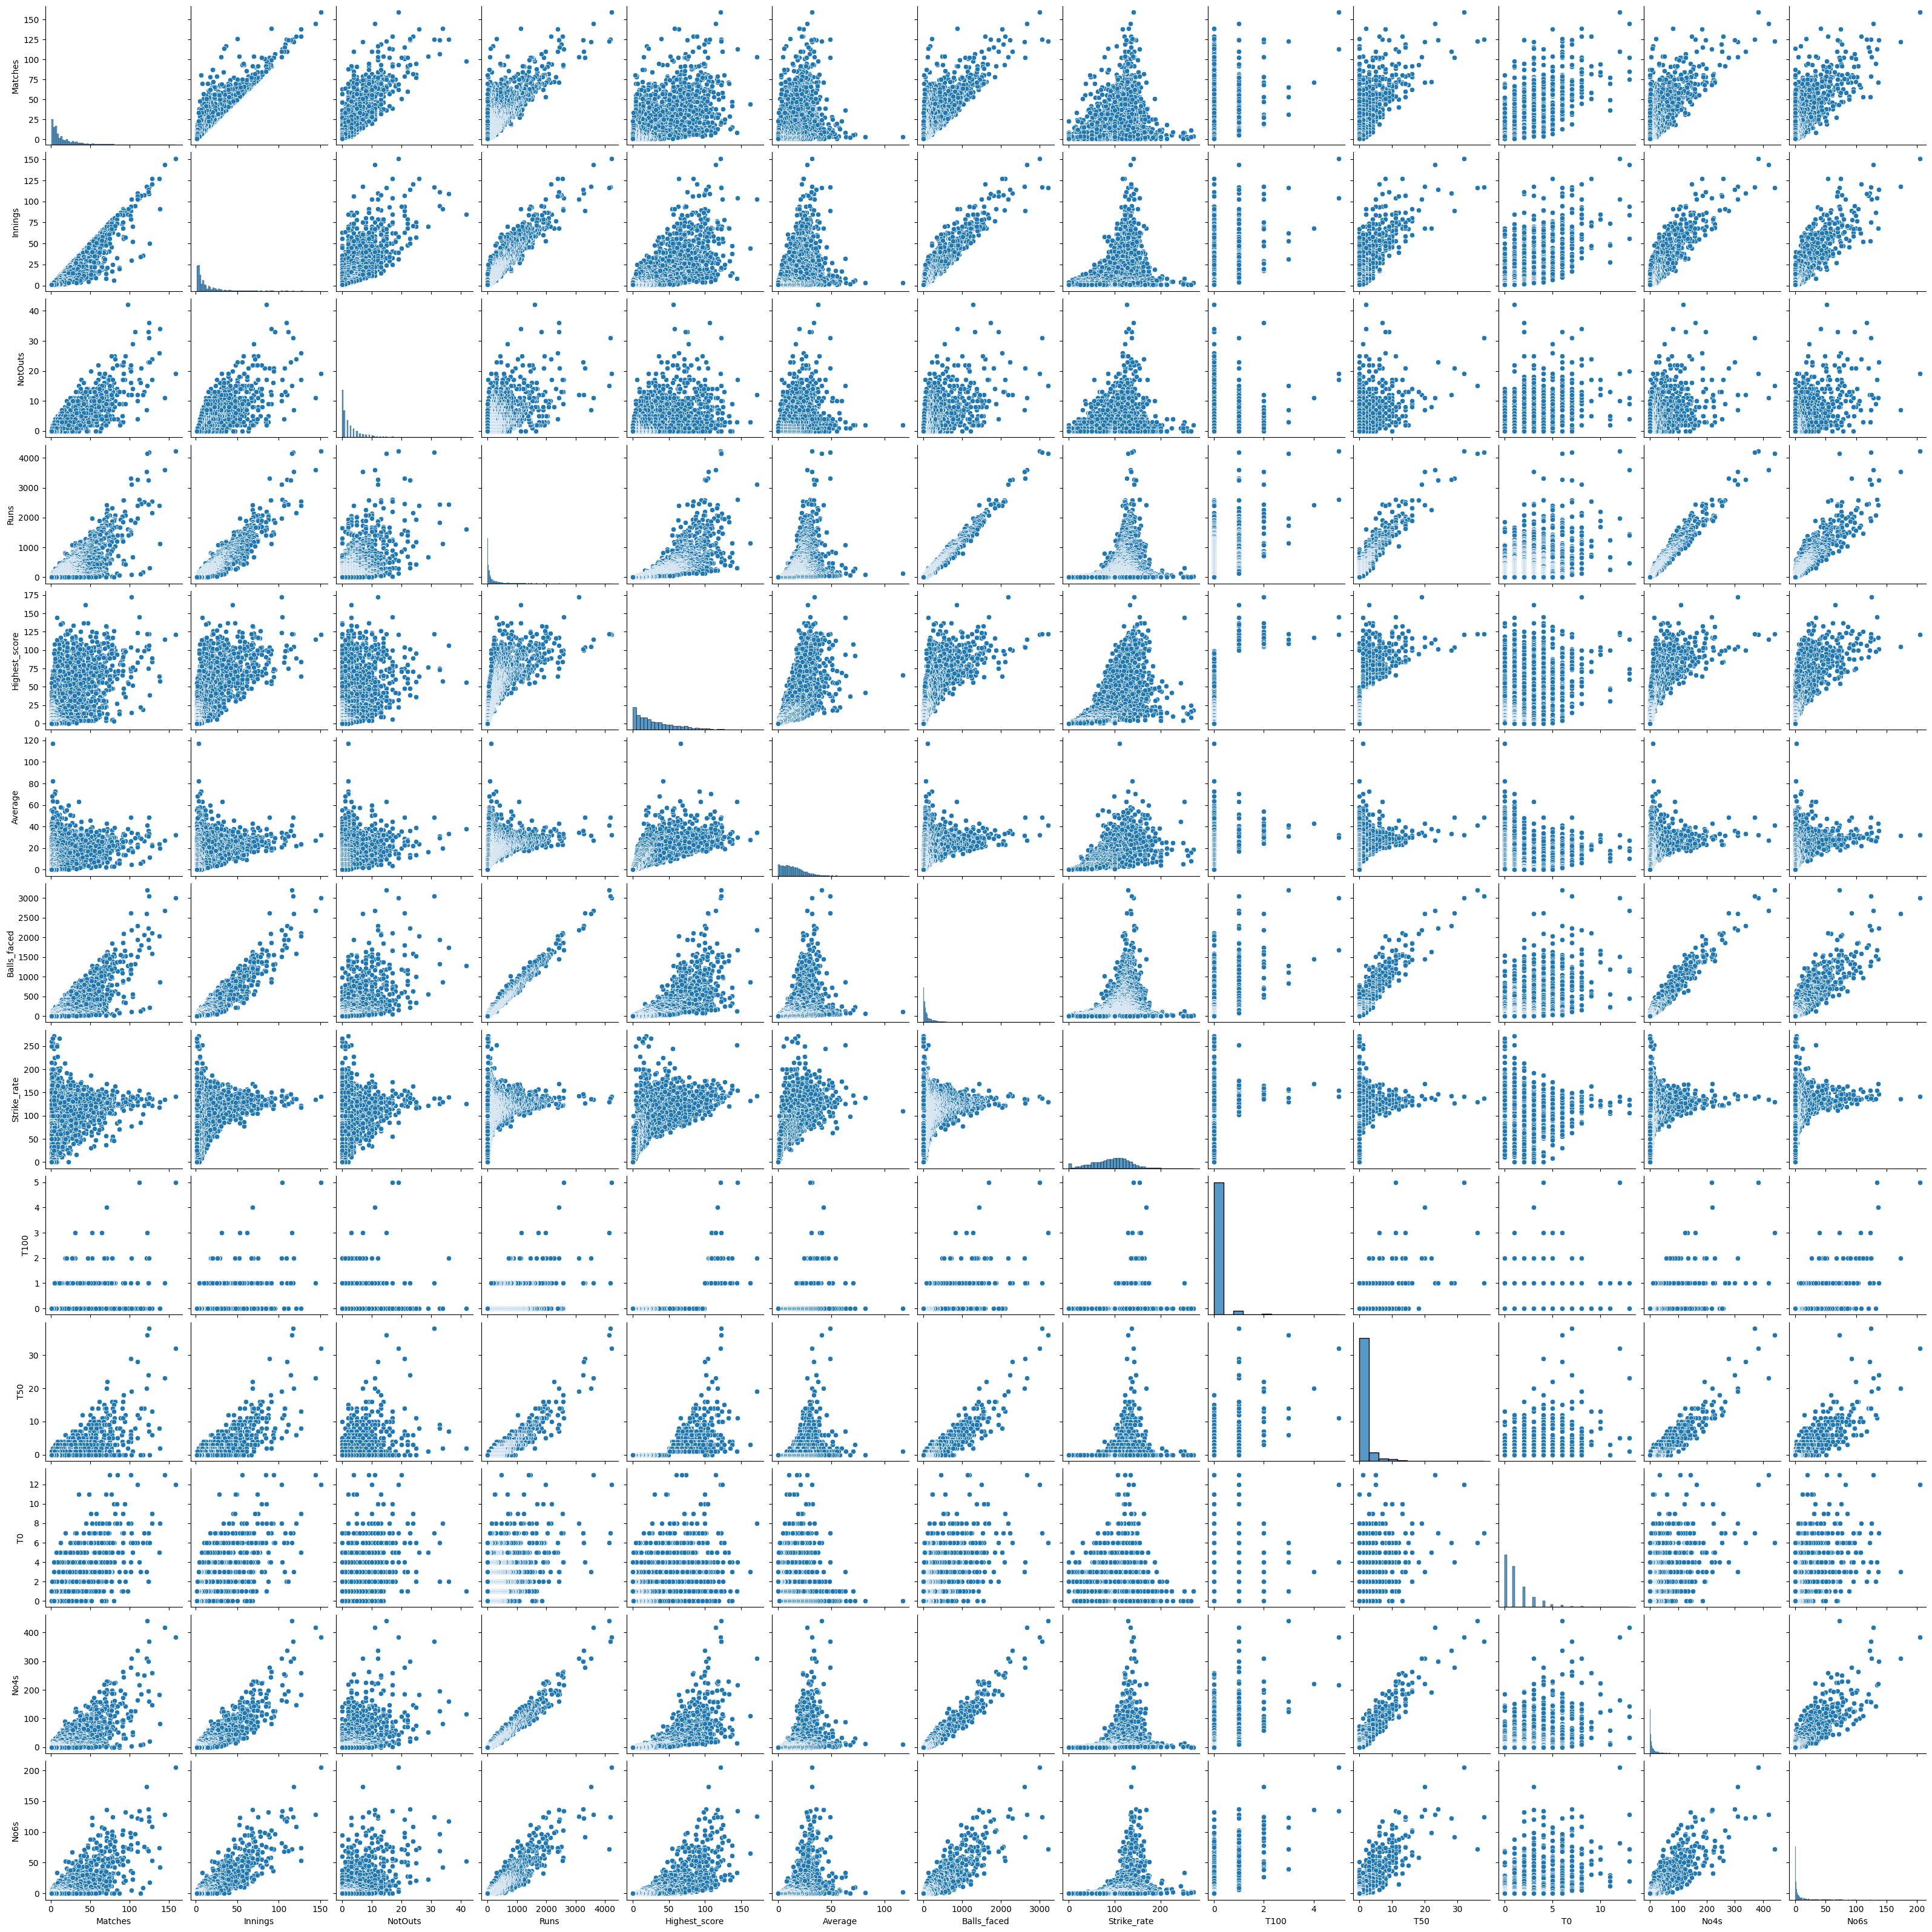

In [28]:
sns.pairplot(df5)

There are many plots in which columns have linear relationship:
- Innings-Matches
- Innings-Runs
- Runs-Ball_faced
- Ball_faced-No4s
- Runs-No6s

and many more

## Correlation Matrix

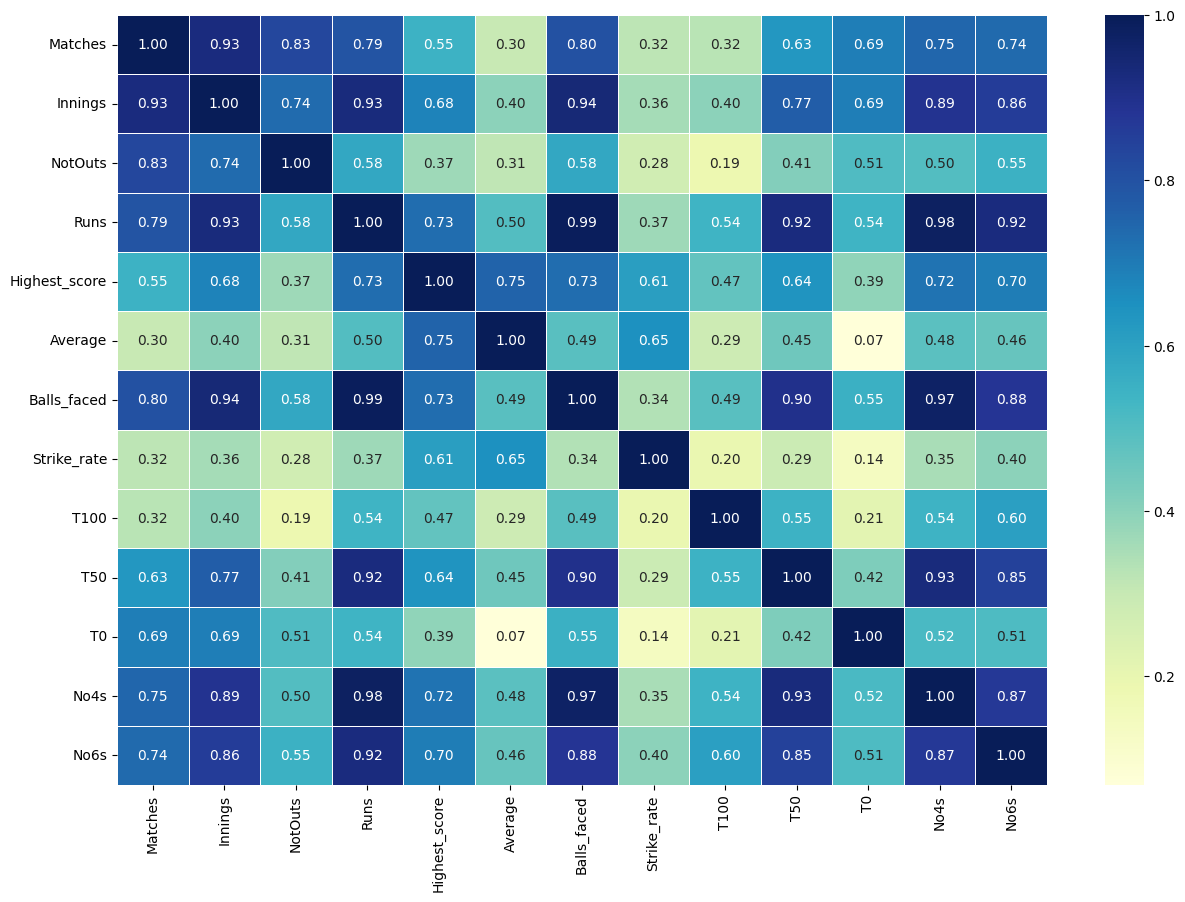

In [29]:
corr_matrix = df5.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')
plt.show()

## Model Preparation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3411 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Matches        3411 non-null   int64  
 1   Innings        3411 non-null   int64  
 2   NotOuts        3411 non-null   int64  
 3   Runs           3411 non-null   int64  
 4   Highest_score  3411 non-null   int64  
 5   Average        3411 non-null   float64
 6   Balls_faced    3411 non-null   int64  
 7   Strike_rate    3411 non-null   float64
 8   T100           3411 non-null   int64  
 9   T50            3411 non-null   int64  
 10  T0             3411 non-null   int64  
 11  No4s           3411 non-null   int64  
 12  No6s           3411 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 373.1 KB


In [31]:
# Split the data
x = df5.drop(columns=['Runs'], axis=1)
y = df5['Runs']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2728, 12)
(683, 12)
(2728,)
(683,)


In [34]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [35]:
y_preds = lm.predict(x_test)

In [36]:
# Evaluate the model
score = lm.score(x_test, y_test)

In [37]:
print("Predictions:", y_preds)
print("Model Score:", score)

Predictions: [ 2.26779631e+01  1.79453247e+02  3.21105807e+01  6.46318631e+01
  6.90294506e+02  1.15537129e+01  2.57333066e+02  4.82081791e+00
  1.49684398e+02 -1.29916826e+01  4.05661090e+02  2.00887395e+03
  1.70897153e+02  8.55114961e+00  5.49820224e+01  4.05474278e+02
  1.25615483e+01  4.51298931e+01  4.90755829e+01  1.27411990e+01
  2.96708729e+01  6.80571972e+01  9.08416912e-01  2.16785206e+01
  2.25918664e+01  6.88123261e+01 -8.47377177e-01  5.17129969e+01
  3.30631348e+00  8.12876933e+01  4.29299483e+02  1.61804707e+01
  4.19208359e+01  1.53909599e+01 -6.76804494e+00  3.59017636e+01
  4.78796079e+02  1.32047536e+01  2.32904016e+01  5.23946884e+01
  1.11679509e+01  1.46749404e+01  3.50001833e+01  8.15437018e+01
  1.38512853e+02  1.04522576e+01  2.48541201e+02  1.06362963e+02
  3.23236063e+01  1.74468408e+02 -1.71191788e+01  4.00156540e+01
  5.73506824e+01  1.61118439e+02  8.41414201e+01 -5.66749522e+00
  8.09930799e-01  3.63148431e+02 -9.53822482e+00  3.29054134e+02
  1.16031812

In [38]:
x1 = df5.drop(columns=['Strike_rate'], axis=1)
y1 = df5['Strike_rate']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20, random_state=0)

lm.fit(x1_train, y1_train)

y1_preds = lm.predict(x1_test)

# Evaluate the model
score_1 = lm.score(x1_test, y1_test)

print("Predictions:", y1_preds)
print("Model Score:", score_1)

Predictions: [ 72.36778037 100.73667835  83.06114371  89.33083368 148.93726426
  82.95822609 122.49104757  63.87926574 110.77678876  50.31016378
 168.1232423  164.65536578 149.43916427  69.30425291 106.01123731
 110.65305249  68.27313373  61.05439228  79.8518285   71.98371195
  81.68360883 117.74340049  65.36670815  65.56105163  62.09116332
  69.96958543  54.68422379  83.87712265  69.04646238  81.37727114
 112.20812267  75.56400315 105.40786382  65.55802967  56.33329458
 119.35622184 146.27863659  75.18241017  74.67580045  96.40556369
  63.29447069  65.54729787 126.28315802  87.4315111  124.62880297
  60.0663042   94.68569783 131.43747203  65.62818022  94.26453219
  49.30260071  98.08882152 103.12142598  94.00899666 153.94648319
  56.59596245  58.43778628 104.47287905  53.8257714  144.65928555
  67.97371468  91.38165513 112.88508288 122.07584849  99.92517045
  72.22682606  78.08571372  83.55427843  53.72010284  73.01786962
 135.10945364  57.13117627  46.26362557  92.76038689 180.487129